In [25]:
import pandas as pd
import numpy as np

data=pd.read_csv('iris1.csv')
data.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
from sklearn import preprocessing
labelE=preprocessing.LabelEncoder()
data['encodeclass']=labelE.fit_transform(data['Class'])
data.columns

Index(['Sepal_Length', ' Sepal_Width', ' Petal_Length', ' Petal_Width',
       'Class', 'encodeclass'],
      dtype='object')

In [21]:
required=data[['Sepal_Length',' Sepal_Width',' Petal_Length',' Petal_Width']]
label=data[['encodeclass']]
required.shape
label.shape



(150, 1)

In [22]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(required,label)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [26]:
m=[[5.9,3,5.1,1.8]]
mn=nb.predict(m)
print(mn)

[2]


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [27]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(required,label,test_size=0.3)
y_train.shape

(105, 1)

In [47]:
nb.fit(x_train,y_train)
x_test.shape

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(45, 4)

In [45]:
predicted=nb.predict(x_test)
predict=predicted.reshape(-1,1)
predict.shape

(45, 1)

Train Confusion Matrix is
 [[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


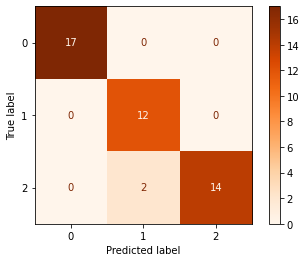

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conftrain=confusion_matrix(y_test,predict)
print("Train Confusion Matrix is\n", conftrain)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, x_test, y_test,cmap='Oranges')  


In [63]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,predict)
print(acc)
#rec=metrics.recall_score(y_test,predict)
#print(rec)
Tr=conftrain[0]
TP=Tr[0]
FP=Tr[1]
br=conftrain[1]
FN=br[0]
TN=br[1]
print(TP)
print(FP)
print(FN)
print(TN)

0.9555555555555556
12
0
0
17


In [65]:
precision=TP/TP+FP
precision

1.0